In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
with open('shellpath_offsets.json') as f:
    paths_df = pd.json_normalize(json.load(f))

paths_df['length_per_goal'] = paths_df['final_path_length'] / paths_df['goals_visited']

In [3]:
paths_df

,final_path_length,goals_visited,napples,planner_name,run_time,scene_name,start_state,planner_params.apply_shellstate_optimization,planner_params.ptp.ptp,planner_params.ptp.timePerAppleSeconds,planner_params.ptp.tryLuckyShots,planner_params.ptp.useCostConvergence,planner_params.ptp.useImprovisedSampler,planner_params.shell_builder_params.offset,length_per_goal
0,364.725068,146,150,ShellPathPlanner,24.934823,appletree,2,True,PRMstar,1.0,True,True,True,0.0,2.498117
1,492.839453,148,150,ShellPathPlanner,34.700165,appletree,7,True,PRMstar,1.0,True,True,True,1.0,3.329996
2,649.573612,115,150,ShellPathPlanner,96.539173,appletree,3,True,PRMstar,1.0,True,True,True,5.0,5.648466
3,563.252477,143,150,ShellPathPlanner,49.103232,appletree,5,True,PRMstar,1.0,True,True,True,1.5,3.938829
4,557.191681,146,150,ShellPathPlanner,49.560449,appletree,7,True,PRMstar,1.0,True,True,True,1.5,3.816381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,593.711737,113,150,ShellPathPlanner,91.573869,appletree,3,True,PRMstar,1.0,True,True,True,4.5,5.254086
106,607.914715,125,150,ShellPathPlanner,79.931266,appletree,4,True,PRMstar,1.0,True,True,True,3.5,4.863318
107,395.837025,146,150,ShellPathPlanner,35.998707,appletree,3,True,PRMstar,1.0,True,True,True,0.0,2.711213
108,416.716280,146,150,ShellPathPlanner,32.125335,appletree,8,True,PRMstar,1.0,True,True,True,0.5,2.854221


In [4]:
agg = paths_df.groupby('planner_params.shell_builder_params.offset')[['goals_visited','length_per_goal']].agg(['sem','mean'])

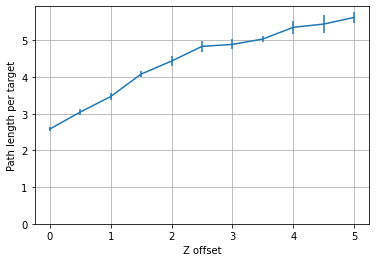

In [5]:
plt.errorbar(x=agg.index, y=agg['length_per_goal']['mean'], yerr=agg['length_per_goal']['sem']*1.96)
plt.ylim(bottom=0)
plt.ylabel('Path length per target')
plt.xlabel('Z offset')

plt.grid()

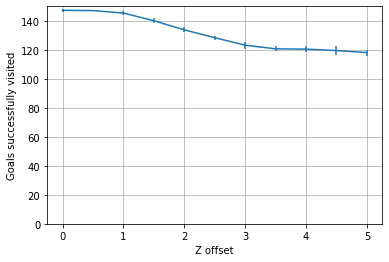

In [6]:
plt.errorbar(x=agg.index, y=agg['goals_visited']['mean'], yerr=agg['goals_visited']['sem']*1.96)
plt.ylim(bottom=0)
plt.ylabel('Goals successfully visited')
plt.xlabel('Z offset')

plt.grid()